Пространственные веса являются одним из способов проиллюстрировать и понять пространственные отношения между объектами.

Вычисление пространственных весов позволяет определить соседние и близкие друг к другу объекты.

При вычислении пространственных весов фактически мы получаем топологию, которая объясняет связь между наблюдениями (объектами). Матрица пространственных весов позволяет связать объекты между собой.
 
В результате вычисления весов получается матрица размером $n\times n$, элементами которой будут являться значения пространственных весов:
$W = \begin{bmatrix}w_{11} & w_{12}& ... & w_{1n} \\w_{21} & w_{22}& ... & w_{2n} \\... & ...& ... & ...\\w_{n1} & w_{n2}& ... & w_{nn}\end{bmatrix}$

Пространственные веса $w_{ij}$ принимают нулевые значения, если объекты не являются соседними, и ненулевые, если объекты соседствуют.

Как правило, объекты не считаются соседями самим себе, то есть диагональные элементы этой матрицы $w_{ii} = 0$.

В самой простой форме матрица весов иллюстрирует наличие соседства между объектами в бинарном виде с весами 1 и 0, где первый присваивается парам соседних объектов, а второй - паре объектов, не являющихся соседями.

> Стоит отметить, что вычислени весов очень сильно зависит от качества исходных данных. Любая проблема в топологии объектов может привести к некорректному расчету весов

In [ ]:
# pip install contextily

In [ ]:
# pip install geopandas

In [ ]:
# pip install rioxarray

In [ ]:
# pip install seaborn

In [ ]:
# pip install pandas

In [ ]:
# pip install shapely

In [ ]:
# pip install pysal

In [10]:
import contextily as cx
import geopandas as gpd
import rioxarray
import seaborn as sn
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from pysal.lib import cg as geometry

/usr/local/lib/python3.9/dist-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-10-6ba9acc38027>:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  imp

In [11]:
from pysal.lib import weights

# Веса по смежности

Смежными считаются объекты, имеющие общую границу.

Есть два принципа определения смежности объектов: 


*   принцип ***ладьи*** - объекты считаются смежными, если у них есть **общая ненулевая граница**;
*   принцип ***королевы*** - объекты считаются смежными, если у них есть хотя бы **одная общая точка**.



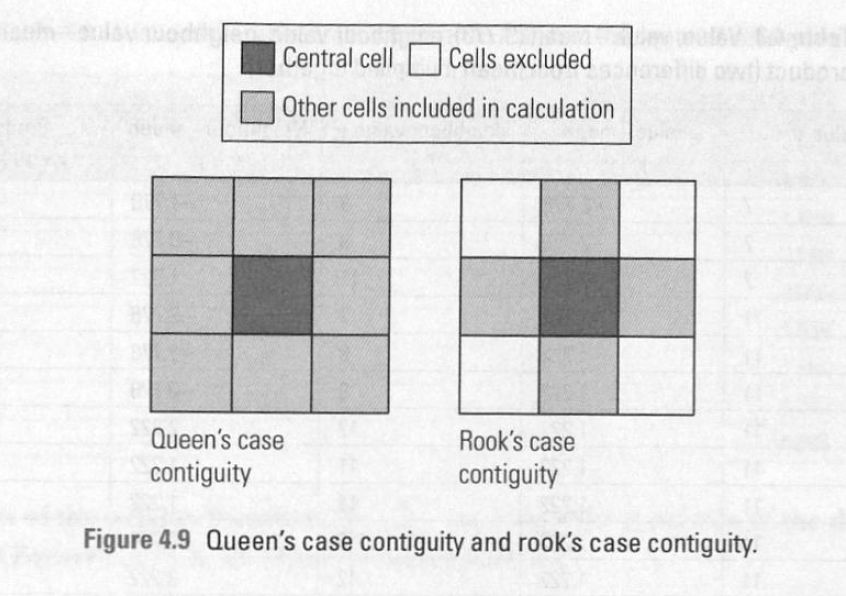

In [12]:
from pysal.lib import weights

In [13]:
mo = gpd.read_file("https://raw.githubusercontent.com/baltti/python-spatial-itmo/main/datasets/mo.geojson")

w_queen = weights.contiguity.Queen.from_dataframe(mo)

/usr/local/lib/python3.9/dist-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/usr/local/lib/python3.9/dist-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/usr/local/lib/python3.9/dist-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/usr/local/lib/python3.9/dist-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.

(<Figure size 640x480 with 1 Axes>, <Axes: >)

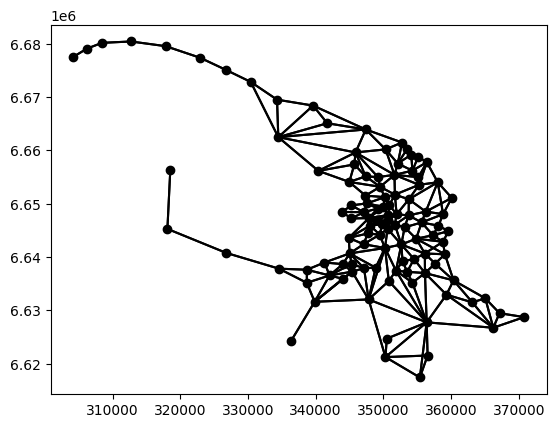

In [16]:
w_queen.plot(mo)

/usr/local/lib/python3.9/dist-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/usr/local/lib/python3.9/dist-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/usr/local/lib/python3.9/dist-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/usr/local/lib/python3.9/dist-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.

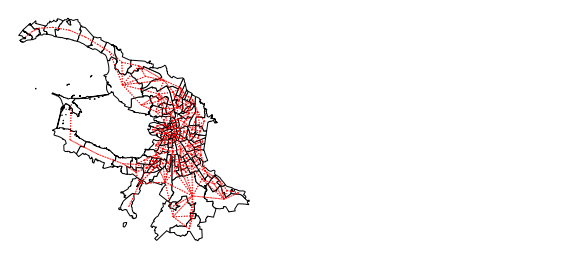

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(10, 15))
for i in range(2):
    ax = mo.plot(
        edgecolor="k", facecolor="w", ax=axs[i]
    )
    # Plot graph connections
    w_queen.plot(
        mo,
        ax=axs[i],
        edge_kws=dict(color="r", linestyle=":", linewidth=1),
        node_kws=dict(marker=""),
    )
    # Remove the axis
    axs[i].set_axis_off()
axs[1].axis([-13040000, -13020000, 3850000, 3860000]);

Сама по себе матрица весов является свойством объекта ```.weights```.

При простом выводе этой матрицы мы получим только ненулевые элементы.

In [17]:
w_queen.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0],
 12: [1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

Выведем полученную матрицу весов в более явном виде.

In [24]:
pd.DataFrame(*w_queen.full()).astype(int))

TypeError: ignored

Также можно проверить, сколько ненулевых элементов матрицы было получено.

In [21]:
w_queen.nonzero

536

Также мы можем посмотреть, какие объекты являются соседями в соответствии с рассчитанными весами.

In [19]:
w_queen.neighbors

{0: [7, 9, 45, 14, 95],
 1: [13, 14],
 2: [107, 10, 11, 6],
 3: [16, 13, 14],
 4: [66, 37, 38, 39, 72, 80, 54, 55, 30],
 5: [66, 6, 10, 59, 12, 77],
 6: [107, 2, 10, 5],
 7: [0, 17, 8, 9, 14, 15],
 8: [15, 7],
 9: [0, 17, 95, 7],
 10: [2, 5, 6, 11, 108, 77, 46, 59],
 11: [2, 10, 108, 55],
 12: [5],
 13: [16, 1, 66, 3, 14],
 14: [0, 1, 66, 3, 37, 7, 39, 44, 45, 13, 16],
 15: [8, 17, 7],
 16: [3, 13, 14],
 17: [9, 15, 95, 7],
 18: [69, 40, 28, 82, 19, 85, 60, 63],
 19: [18, 28, 85, 76],
 20: [21, 22, 71, 72, 24, 75],
 21: [35, 51, 20, 22, 24, 25, 62],
 22: [20, 21, 30, 23, 72, 24, 25],
 23: [22, 30, 105, 42, 25],
 24: [65, 34, 35, 20, 21, 22, 71],
 25: [51, 21, 22, 23, 41, 42],
 26: [29, 94, 27, 45, 30],
 27: [45, 39, 26, 44, 29],
 28: [40, 18, 19, 76],
 29: [26, 27, 30, 39],
 30: [4, 39, 72, 105, 22, 23, 26, 29, 94],
 31: [32, 33, 34, 64, 36, 87],
 32: [34, 35, 36, 57, 62, 31],
 33: [65, 34, 31, 87],
 34: [32, 65, 33, 35, 24, 31],
 35: [32, 34, 21, 24, 62],
 36: [32, 57, 76, 31],
 37: [

Одно из свойств полученной матрицы весов - это ```.cardinalities``` или количество соседей для каждого наблюдения.

In [25]:
w_queen.cardinalities

{0: 5,
 1: 2,
 2: 4,
 3: 3,
 4: 9,
 5: 6,
 6: 4,
 7: 6,
 8: 2,
 9: 4,
 10: 8,
 11: 4,
 12: 1,
 13: 5,
 14: 11,
 15: 3,
 16: 3,
 17: 4,
 18: 8,
 19: 4,
 20: 6,
 21: 7,
 22: 7,
 23: 5,
 24: 7,
 25: 6,
 26: 5,
 27: 5,
 28: 4,
 29: 4,
 30: 9,
 31: 6,
 32: 6,
 33: 4,
 34: 6,
 35: 5,
 36: 4,
 37: 4,
 38: 4,
 39: 7,
 40: 5,
 41: 6,
 42: 7,
 43: 6,
 44: 4,
 45: 8,
 46: 5,
 47: 5,
 48: 3,
 49: 5,
 50: 4,
 51: 6,
 52: 6,
 53: 3,
 54: 5,
 55: 8,
 56: 4,
 57: 7,
 58: 3,
 59: 7,
 60: 9,
 61: 3,
 62: 7,
 63: 4,
 64: 3,
 65: 9,
 66: 8,
 67: 6,
 68: 4,
 69: 5,
 70: 6,
 71: 5,
 72: 6,
 73: 6,
 74: 5,
 75: 5,
 76: 5,
 77: 3,
 78: 2,
 79: 3,
 80: 6,
 81: 3,
 82: 6,
 83: 2,
 84: 1,
 85: 7,
 86: 2,
 87: 6,
 88: 1,
 89: 2,
 90: 3,
 91: 5,
 92: 4,
 93: 3,
 94: 7,
 95: 6,
 96: 2,
 97: 5,
 98: 2,
 99: 4,
 100: 2,
 101: 5,
 102: 2,
 103: 5,
 104: 5,
 105: 7,
 106: 3,
 107: 3,
 108: 5,
 109: 4}

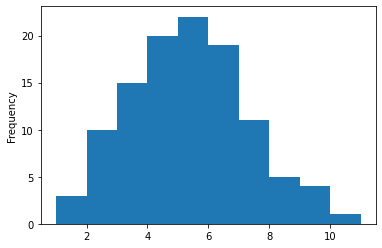

In [ ]:
s = pd.Series(w_queen.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

Аналогично можно получить веса по принципу ладьи.

In [26]:
w_rook = weights.contiguity.Rook.from_dataframe(mo)

In [28]:
pd.DataFrame(*w_rook.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
107,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
w_rook.neighbors

{0: [7, 9, 45, 14, 95],
 1: [13, 14],
 2: [107, 10, 11, 6],
 3: [16, 13, 14],
 4: [66, 37, 38, 39, 72, 80, 54, 55, 30],
 5: [66, 6, 10, 59, 12, 77],
 6: [107, 2, 10, 5],
 7: [0, 17, 8, 9, 14, 15],
 8: [15, 7],
 9: [0, 17, 95, 7],
 10: [2, 5, 6, 59, 11, 108, 77],
 11: [2, 10, 108, 55],
 12: [5],
 13: [16, 1, 66, 3, 14],
 14: [0, 1, 66, 3, 37, 7, 39, 44, 13, 45, 16],
 15: [8, 17, 7],
 16: [3, 13, 14],
 17: [9, 15, 95, 7],
 18: [69, 40, 60, 82, 19, 85, 28, 63],
 19: [18, 28, 85, 76],
 20: [22, 71, 24, 72, 75],
 21: [35, 51, 22, 24, 25, 62],
 22: [20, 21, 23, 72, 25, 30],
 23: [22, 30, 105, 42, 25],
 24: [65, 34, 35, 20, 21, 71],
 25: [51, 21, 22, 23, 41, 42],
 26: [29, 94, 27, 45, 30],
 27: [29, 39, 26, 44, 45],
 28: [40, 18, 19, 76],
 29: [26, 27, 30, 39],
 30: [4, 39, 72, 105, 22, 23, 26, 29, 94],
 31: [32, 33, 34, 64, 36, 87],
 32: [34, 35, 36, 57, 62, 31],
 33: [65, 34, 31, 87],
 34: [32, 33, 65, 35, 24, 31],
 35: [32, 34, 21, 24, 62],
 36: [32, 57, 76, 31],
 37: [66, 4, 14, 39],
 38:

4.24793388429752


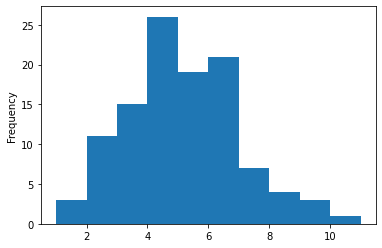

In [ ]:
s = pd.Series(w_rook.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

## Веса по расстоянию

Кроме смежности, соседство объектов может быть определено как функция расстояния.

Для этого, как правило, нужна матрица расстояний между объектами. Эта матрица передается в так называемую функцию "ядра" (kernel function), которая превращает информацию о близости в функцию близости от расстояния.

### K-ближайших соседей

При использовании этого метода соседи определяются как определенное количество (k) ближайших объектов.

Есть, однако, неоднозначность в том, как рассчитывать расстояние между полигонами. Для этого, как правило, используют центроиды.

In [32]:
wk4 = weights.distance.KNN.from_dataframe(mo, k=4)

In [ ]:
wk4.islands

[]

In [ ]:
wk4.histogram

[(4, 110)]

### Веса ядра (kernel weights)

При расчете таких весов используется основной принцип, что более близкие наблюдения имеют больший вес, чем удаленные наблюдения.

Такие веса являются наиболее часто используемыми, здесь предполагается, что с увеличением расстояния пространственная близость будет уменьшаться.

In [ ]:
w_kernel = weights.distance.Kernel.from_dataframe(mo)

Полученные веса будут зависеть от двух основных параметров:


1.   функция ядра (kernel function);
2.   пропускная способность (bandwidth).

Функция ядра определяет как модулируется расстояние, то есть как ядро будет затухать по мере отдаления от него.

По умолчанию используется треугольное ядро.



In [ ]:
w_kernel.function

'triangular'

Полоса пропускания определяет расстояние, на котором применяется функция ядра. То есть, для наблюдений, не попавших в полосу пропускания веса будут равны нулю.

По умолчанию используется треугольное ядро с фиксированной шириной полосы пропускания.

Кроме фиксированных также могут использоваться и адаптивные полосы пропускания.

In [ ]:
w_kernel.bandwidth[0:5]

array([[17068.11995776],
       [17068.11995776],
       [17068.11995776],
       [17068.11995776],
       [17068.11995776]])

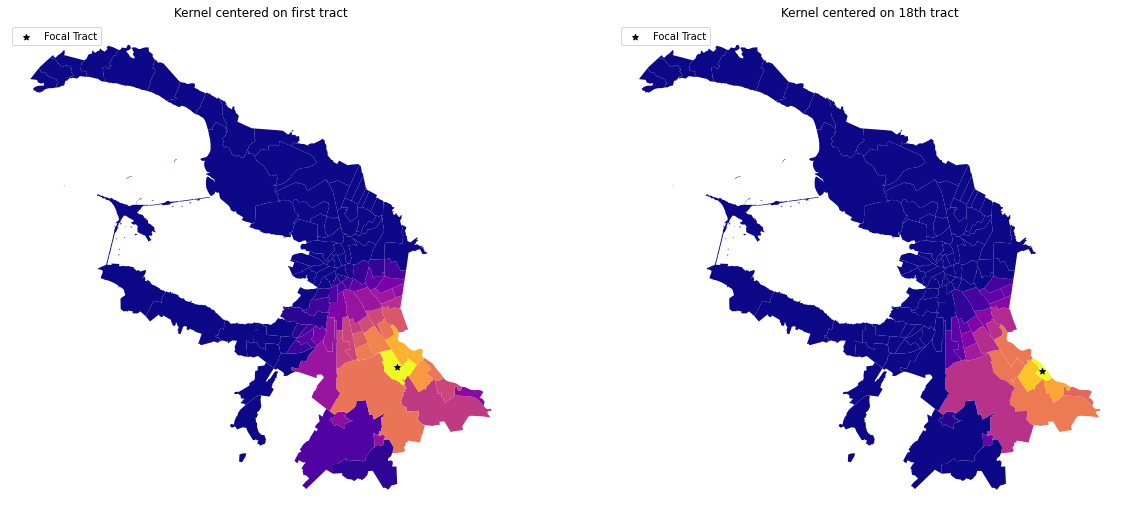

In [ ]:
# Create full matrix version of weights
full_matrix, ids = w_kernel.full()

# Set up figure with two subplots in a row
f, ax = plt.subplots(1, 2, 
                     figsize=(20, 15), 
                     subplot_kw=dict(aspect="equal"))

# Append weights for first polygon and plot on first subplot
mo.assign(weight_0=full_matrix[0]).plot("weight_0", 
                                        cmap="plasma", 
                                        ax=ax[0])

# Append weights for 18th polygon and plot on first subplot
mo.assign(weight_18=full_matrix[17]).plot("weight_18", 
                                          cmap="plasma", 
                                          ax=ax[1])

# Add centroid of focal tracts
mo.iloc[[0], :].centroid.plot(ax=ax[0], 
                              marker="*", 
                              color="k", 
                              label="Focal Tract")

mo.iloc[[17], :].centroid.plot(ax=ax[1], 
                               marker="*", 
                               color="k", 
                               label="Focal Tract")

# Add titles
ax[0].set_title("Ядро с центром на первом объекте")
ax[1].set_title("Ядро с центром в 18 объекте")

# Remove axis
[ax_.set_axis_off() for ax_ in ax]

# Add legend
[ax_.legend(loc="upper left") for ax_ in ax];

In [ ]:
w_kernel.pct_nonzero

50.90909090909091

## Блочные веса (block weights)

В этом случае соседство определяется принадлежностью к группе объектов (блоку). 
Фактически группа-блок связывает наблюдения между собой объекты и они считаются близкими. То есть для каждой пары наблюдений в группе вес будет равен единице, а для всех остальных наблюдений, не входящих в группу, вес в паре с любым наблюдением в группе, будет нулевым.

В результате получается матрица, состоящая из блоков единиц, расположенных по диагонали.

In [30]:
w_bl = weights.util.block_weights(
    mo["ADMIN_L5"].values,
    ids = mo["NAME"].values,
)

/usr/local/lib/python3.9/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 18 disconnected components.
 There is 1 island with id: 84.
  warnings.warn(message)


In [31]:
pd.DataFrame(*w_bl.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
Петро-Славянка,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Александровская,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
округ Сосновая поляна,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Тярлево,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
округ Московская застава,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
округ Невская застава,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
Белоостров,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
Стрельна,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
округ Юго-Запад,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Set up figure and axis
f, axs = plt.subplots(1, 2, figsize=(9, 9))

# веса по смежности, определенные по приципу королевы
ax = axs[0]
mo.plot(ax=ax)
w_queen.plot(mo,
             edge_kws=dict(linewidth=1, color="orangered"), 
             node_kws=dict(marker="*"), 
             ax=ax)
ax.set_axis_off()
ax.set_title("Queen")

# веса по расстоянию KNN
ax = axs[1]
mo.plot(ax=ax)
wk4.plot(mo,
         edge_kws=dict(linewidth=1, color="orangered"),
         node_kws=dict(marker="*"),
         ax=ax)
ax.set_axis_off()
ax.set_title("$K$-NN 4")

f.tight_layout()
plt.show()

Следует отметить, что пространственные веса играют значительную роль при расчете пространственной автокорреляции и построении пространственной регрессии.